(10000, 28, 28)
(10000,)
2


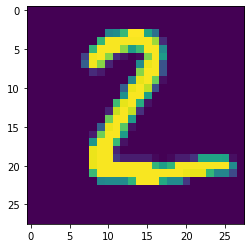

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model 
from tensorflow.keras.layers import Dense, Dropout, LSTM 
import matplotlib.pyplot as plt 
%matplotlib inline 

# load the mnist dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.00
x_test  = x_test  / 255.00 

print(x_test.shape)
print(y_test.shape)

plt.imshow(x_test[1])
# print(x_test[1])
print(y_test[1])

In [ ]:
model = Sequential() 

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer = opt,
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))
model.save('MNIST_LSTM.model')

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 9024/60000 [===>..........................] - ETA: 1:55 - loss: 1.7276 - accuracy: 0.4104

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

0

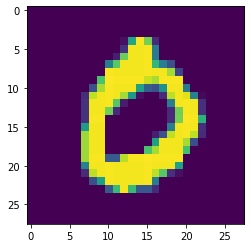

In [5]:
loaded = load_model("MNIST_LSTM.model")
loaded.summary()
plt.imshow(x_test[3])
loaded.predict_classes(x_test)[3]